# Performance Metrics Model Selection and Evaluation 

## Imbalance

In the context of machine learning, imbalance refers to situations where the classes in a dataset are not evenly distributed. For example, in fraud detection or loan default prediction, the majority of transactions or customers might belong to a "normal" or "non-default" class, while only a small fraction represents the "fraudulent" or "default" class. This imbalance poses a significant challenge for evaluating models, especially when relying on accuracy as the primary performance metric.

Accuracy measures the proportion of correctly classified instances out of the total instances. While this is a simple and intuitive metric, ***it can be misleading in imbalanced datasets***. For instance, consider a dataset where 95% of the samples belong to the majority class. A naive model that predicts only the majority class would achieve 95% accuracy without learning anything meaningful about the minority class. In this case, the model's accuracy does not reflect its ability to detect the rare, yet often critical, minority instances.

In imbalanced scenarios, metrics such as precision, recall, F1-score, and area under the precision-recall curve become more important. Precision focuses on the proportion of correctly predicted positive cases out of all predicted positives, making it useful when false positives are costly. Recall emphasizes the proportion of true positives captured by the model, highlighting its ability to identify minority instances. The F1-score combines precision and recall into a single metric, offering a balanced view when both metrics are equally important.

In practice, relying solely on accuracy in the presence of imbalance can result in poorly performing models that seem deceptively strong. Instead, using a combination of metrics tailored to the specific application, along with careful handling of the imbalance (e.g., resampling techniques or weighted loss functions), provides a more comprehensive evaluation of model performance.

## Confusion Matrix

### Definition

Before we get into the details of different scoring metrics, let's take a look at a
confusion matrix, a matrix that lays out the performance of a learning algorithm. A confusion matrix is simply a square matrix that reports the counts of the true
positive (TP), true negative (TN), false positive (FP), and false negative (FN)
predictions of a classifier, as shown in the following figure:

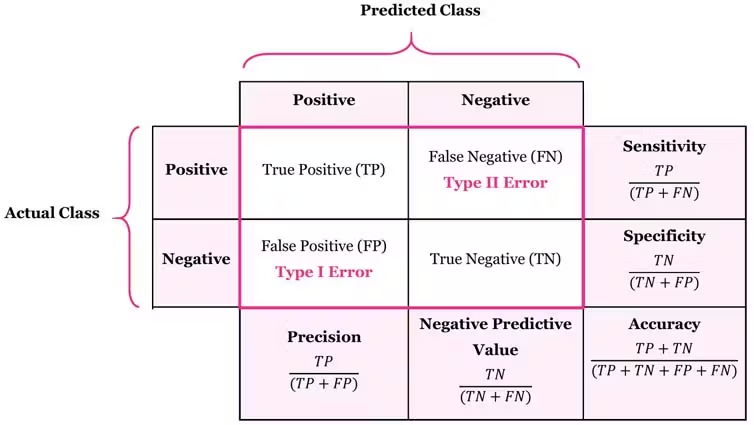

Although these metrics can be easily computed manually by comparing the true and
predicted class labels, scikit-learn provides a convenient confusion_matrix function
that we can use, as follows.

### Example

Here’s a practical example of using a confusion matrix in a financial context: predicting whether a customer will default on a loan (binary classification: "Default" or "No Default"). We'll train a Random Forest Classifier on a synthetic dataset, evaluate the predictions, and visualize the confusion matrix.

In [8]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [9]:
# Step 1: Simulate a financial dataset (loan default prediction)
# Generate a dataset with 2 classes (Default = 1, No Default = 0)
X, y = make_classification(
    n_samples=5000,       # Total number of samples
    n_features=10,        # Total number of features
    n_informative=5,      # Number of informative features
    n_redundant=2,        # Number of redundant features
    weights=[0.8, 0.2],   # Class imbalance (80% No Default, 20% Default)
    flip_y=0.02,          # Add noise to labels
    random_state=42       # Random seed for reproducibility
)

In [10]:
# step 2: Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

In [11]:
# Step 3: Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [12]:
# Step 4: Make predictions on the test set
y_pred = model.predict(X_test)

In [13]:
# Step 5: Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[1180   25]
 [  61  234]]


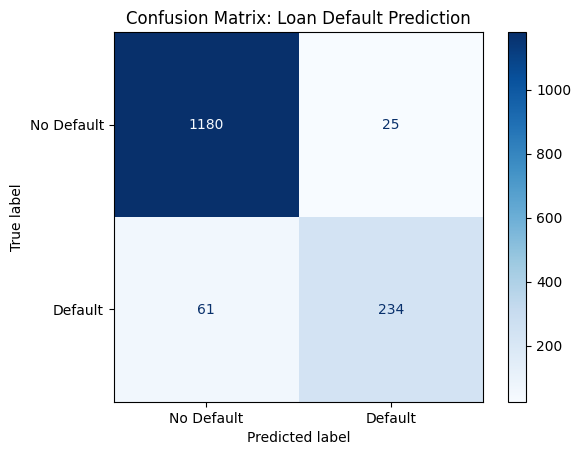

In [14]:
# Step 6: Display the confusion matrix as a heatmap
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Default", "Default"])
disp.plot(cmap="Blues", values_format='d')
plt.title("Confusion Matrix: Loan Default Prediction")
plt.show()

In [15]:
# Step 7: Generate a classification report for additional metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=["No Default", "Default"]))


Classification Report:
              precision    recall  f1-score   support

  No Default       0.95      0.98      0.96      1205
     Default       0.90      0.79      0.84       295

    accuracy                           0.94      1500
   macro avg       0.93      0.89      0.90      1500
weighted avg       0.94      0.94      0.94      1500



## Performance Metrics

### Accuracy

Both the prediction error (ERR) and accuracy (ACC) provide general information
about how many examples are misclassified. The error can be understood as the
sum of all false predictions divided by the number of total predictions, and the
accuracy is calculated as the sum of correct predictions divided by the total number
of predictions, respectively:

$$
ERR = \frac{FP+FN}{FP + FN + TP + TN}
$$

The prediction accuracy can then be calculated directly from the error:

$$
ACC = \frac{TP+TN}{FP + FN + TP + TN} = 1 -ERR
$$

### Recall and Precision

**Recall** (also called **Sensitivity** or **True Positive Rate**) is a metric used in classification problems, particularly in binary classification. It measures the proportion of actual positive instances that are correctly identified by the model.

Mathematically, recall (or sensitivity) is defined as:

$$
\text{Recall} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Negatives (FN)}}
$$

Where:
- **True Positives (TP)**: Cases where the model correctly predicts the positive class.
- **False Negatives (FN)**: Cases where the model incorrectly predicts the negative class while they are actually positive.

**Precision** is used particularly when ***false positives are costly***. It measures how many of the predicted positive cases are actually correct.

**Mathematical Formula**

$$
\text{Precision} = \frac{\text{True Positives (TP)}}{\text{True Positives (TP)} + \text{False Positives (FP)}}
$$

Where:

- **True Positives (TP)**: Cases where the model correctly predicts the positive class.

- **False Positives (FP)**: Cases where the model incorrectly predicts the positive class when it is actually negative.

**Why is Precision Important?**

- **Minimizing False Positives**: In scenarios where **false positives** are costly (e.g., diagnosing a patient as having cancer when they do not), precision is more important than recall.

- **Useful in Spam Detection**: A high precision means that most of the emails classified as spam are truly spam, reducing the risk of marking important emails as spam.

**Why is Recall Important?**

- High recall is essential when **missing a positive case** is costly, such as in **medical diagnosis** (e.g., cancer detection).
- It is crucial when dealing with **fraud detection**, where failing to identify a fraudulent transaction can have serious consequences.

**Precision vs. Recall: When to Choose What?**

| Metric | Definition | When to Use |
|--------|-----------|-------------|
| **Precision** | `TP / (TP + FP)` | When **false positives** are costly (e.g., spam detection, cancer diagnosis). |
| **Recall** | `TP / (TP + FN)` | When **false negatives** are costly (e.g., missing fraud cases or sick patients). |

**Trade-off:**  
- If you increase precision, recall may drop.
- If you increase recall, precision may drop.
- The **F1-score** balances both.

In [17]:
# Python Example: Computing Recall
# Let's generate a synthetic dataset, train a classification model, and compute recall.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score

# Generating synthetic data
np.random.seed(42)
n_samples = 1000

# Simulating a binary classification problem (0 = Negative, 1 = Positive)
X = np.random.rand(n_samples, 5)  # 5 features
y = np.random.choice([0, 1], size=n_samples, p=[0.7, 0.3])  # Imbalanced dataset (30% positives)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a simple classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Computing recall
recall = recall_score(y_test, y_pred)

print(f"Recall (Sensitivity): {recall:.2f}")


Recall (Sensitivity): 0.09


**Explanation of the Code**

1. We create a **synthetic dataset** where 30% of the instances belong to the positive class.
2. We split the data into **training and test sets**.
3. We train a **Random Forest Classifier**.
4. We make predictions and **calculate recall** using `recall_score` from `sklearn.metrics`.

**Interpreting the Output**

- If **recall is high (~1.0)**: The model correctly identifies most positive cases.
- If **recall is low (~0.3 - 0.5)**: The model is missing many positive cases (high False Negatives).

**Trade-off: Recall vs. Precision**

- A model with **high recall** may **misclassify negatives as positives** (higher False Positives).
- A model with **high precision** may **fail to detect positives** (higher False Negatives).
- The **F1-score** is often used to balance recall and precision.

### Understanding the F1 Score

The **F1 Score** is a performance metric used in classification problems, particularly in imbalanced datasets. It is the **harmonic mean** of **Precision** and **Recall**, providing a single score that balances the trade-off between the two.

**Formula for F1 Score**

$$
F1 = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}
$$

Where:

- **Precision**: Measures how many of the predicted positives are actually correct.

- **Recall (Sensitivity)**: Measures how many actual positive cases were correctly predicted.

**Why is the F1 Score Important?**

- **Useful in imbalanced datasets**: If a dataset has more negatives than positives, accuracy can be misleading.

- **Balances false positives and false negatives**: When both are critical, F1-score gives a better assessment.

- **Avoids misleading results**: Unlike accuracy, F1-score considers **both precision and recall**, making it ideal when you can't afford to ignore false negatives or false positives.

In [18]:
# Python Example: Computing F1 Score
# Let's generate a synthetic dataset, train a classifier, and compute the F1-score.

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report

# Generating synthetic data
np.random.seed(42)
n_samples = 1000

# Simulating a binary classification problem (0 = Negative, 1 = Positive)
X = np.random.rand(n_samples, 5)  # 5 features
y = np.random.choice([0, 1], size=n_samples, p=[0.7, 0.3])  # Imbalanced dataset (30% positives)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a simple classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Computing precision, recall, and F1-score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Displaying results
print(f"Precision: {precision:.2f}")
print(f"Recall (Sensitivity): {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Displaying the classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Precision: 0.38
Recall (Sensitivity): 0.09
F1-score: 0.15

Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.95      0.83       146
           1       0.38      0.09      0.15        54

    accuracy                           0.71       200
   macro avg       0.56      0.52      0.49       200
weighted avg       0.64      0.71      0.65       200



**Explanation of the Code**

1. **Dataset Generation**: We create a synthetic dataset where **30% of the instances** belong to the positive class.

2. **Model Training**: We train a **Random Forest Classifier**.

3. **Prediction and Evaluation**:
   - We compute **Precision, Recall, and F1-score**.
   - We print a **classification report**, which includes accuracy, precision, recall, and F1-score for each class.

**Interpreting the Output**

- If **F1-score is close to 1**, the model is performing well.

- If **F1-score is low**, the model is either missing positive cases (low recall) or making too many false positive predictions (low precision).

- **F1-score is useful when you need a balance between Precision and Recall.**

**Comparison: When to Use Accuracy, Precision, Recall, and F1?**

| Metric | Definition | When to Use |
|--------|-----------|-------------|
| **Accuracy** | `(TP + TN) / (TP + TN + FP + FN)` | When classes are **balanced**. |
| **Precision** | `TP / (TP + FP)` | When **false positives** are costly (e.g., spam detection). |
| **Recall** | `TP / (TP + FN)` | When **false negatives** are costly (e.g., cancer detection). |
| **F1 Score** | Harmonic mean of Precision & Recall | When **both FP & FN matter**, especially in **imbalanced datasets**. |

**Conclusion**

- **Use the F1-score** when dealing with **imbalanced datasets** where both false positives and false negatives matter.

- **Combine it with a confusion matrix** to visualize the classifier's errors.

- **Precision and Recall are key components** of the F1-score, so you should check them individually if needed.

## Threshold

The **threshold** in a classification model is the value that determines how the model decides between classes, such as predicting "positive" or "negative." When a model makes predictions, it often outputs a probability score for each instance, representing the likelihood that the instance belongs to the positive class. The threshold is a cutoff value applied to this probability to classify the instance.

For example, if a model predicts a probability of 0.8 that a customer will default on a loan, and the threshold is set to 0.5, the model will classify this customer as "default." However, if the threshold is increased to 0.9, the same prediction would classify the customer as "non-default" because the predicted probability does not exceed the higher threshold.

Adjusting the threshold changes the balance between **true positives**, **false positives**, **true negatives**, and **false negatives**. A lower threshold makes the model more sensitive (capturing more true positives) but may also increase false positives. A higher threshold makes the model more specific (reducing false positives) but may miss true positives.

Choosing the right threshold depends on the specific application and the cost of false positives versus false negatives. For instance, in fraud detection, you might prefer a lower threshold to catch as many fraudulent transactions as possible, even if it results in more false alarms. Conversely, in medical diagnostics, a higher threshold might be chosen to avoid unnecessary treatments or panic.

By default, most classification models in **scikit-learn** use a **threshold of 0.5** for predicting class labels. However, depending on whether you want to **increase precision or recall**, you can adjust this **decision threshold**.

**Why Adjust the Threshold?**

- **To increase precision**: Set a **higher** threshold → Predict "positive" only when the model is very confident.

- **To increase recall**: Set a **lower** threshold → Capture more positives, even at the cost of more false positives.

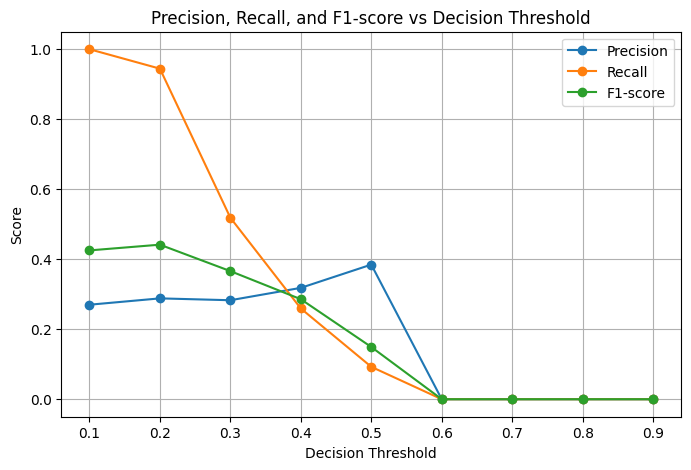

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score

# Generating synthetic data
np.random.seed(42)
n_samples = 1000

# Simulating a binary classification problem (0 = Negative, 1 = Positive)
X = np.random.rand(n_samples, 5)  # 5 features
y = np.random.choice([0, 1], size=n_samples, p=[0.7, 0.3])  # Imbalanced dataset (30% positives)

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Training a simple classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predicting probabilities instead of class labels
y_probs = model.predict_proba(X_test)[:, 1]  # Probability of being in class 1

# Define different thresholds and compute precision & recall
thresholds = np.linspace(0.1, 0.9, 9)  # Thresholds from 0.1 to 0.9
precisions, recalls, f1_scores = [], [], []

for t in thresholds:
    y_pred_adjusted = (y_probs >= t).astype(int)
    precisions.append(precision_score(y_test, y_pred_adjusted, zero_division=0))
    recalls.append(recall_score(y_test, y_pred_adjusted))
    f1_scores.append(f1_score(y_test, y_pred_adjusted))

# Plot Precision-Recall vs Threshold
plt.figure(figsize=(8,5))
plt.plot(thresholds, precisions, label="Precision", marker="o")
plt.plot(thresholds, recalls, label="Recall", marker="o")
plt.plot(thresholds, f1_scores, label="F1-score", marker="o")
plt.xlabel("Decision Threshold")
plt.ylabel("Score")
plt.title("Precision, Recall, and F1-score vs Decision Threshold")
plt.legend()
plt.grid()
plt.show()

**Explanation of the Code**

1. **Train a classifier** and get predicted probabilities using `.predict_proba()`.

2. **Loop through different thresholds** from `0.1` to `0.9`:
   - Convert probabilities into class labels based on the threshold.
   - Compute **Precision, Recall, and F1-score**.
3. **Plot Precision, Recall, and F1-score** against the threshold.

**Interpreting the Graph**

- **Higher threshold (e.g., 0.8 - 0.9) → Higher precision, lower recall**  
  → The model predicts positive cases **only when very confident**, reducing false positives but missing many positives.

- **Lower threshold (e.g., 0.1 - 0.2) → Higher recall, lower precision**  
  → The model predicts positive cases **more liberally**, capturing most positives but also increasing false positives.

- **Optimal threshold depends on the problem**:  
  - **Medical diagnosis?** Prioritize recall (low threshold).  
  - **Spam filtering?** Prioritize precision (high threshold).  
  - **Balanced case?** Use the **F1-score** to find the best threshold.

**Conclusion**

- The **default threshold (0.5)** may not be optimal.

- **Choose the threshold based on the business need**:
  - **Lower threshold → Higher recall (fewer false negatives)**.
  - **Higher threshold → Higher precision (fewer false positives)**.

- **Use Precision-Recall-F1 plots** to decide the best threshold.

## Plotting a Receiver Operating Characteristic Curve

A **ROC curve**, which stands for Receiver Operating Characteristic curve, is a graph used to evaluate the performance of a classification model. It shows how well the model can distinguish between two classes (such as "positive" and "negative") at different thresholds. The curve is created by plotting two key metrics: the **True Positive Rate (TPR)**, which tells us how many actual positives the model correctly identifies, and the **False Positive Rate (FPR)**, which shows how many actual negatives are incorrectly classified as positives.

The idea behind the ROC curve is to visualize the trade-off between detecting true positives and avoiding false positives. A good model will have a curve that climbs quickly toward the top-left corner of the plot, which means it achieves a high TPR with a low FPR. If the curve is close to the diagonal line, it means the model is no better than random guessing.

The ROC curve is especially useful when you want to compare the performance of models or understand how a model behaves at different thresholds, helping you choose the one that best fits your needs.

**Interpretation**:

- A **perfect model** would achieve a TPR of 1 and FPR of 0, resulting in a curve that passes through the top-left corner.
- A **random model** would produce a diagonal line from (0, 0) to (1, 1).


**ROC Area Under the Curve (ROC AUC)**

The **ROC AUC** is the area under the ROC curve and provides a single metric to summarize the model's performance:
- A **perfect model** has an AUC of **1.0**.
- A model with no discriminative power has an AUC of **0.5** (the diagonal line).

**Precision-Recall (PR) Curve**

The **Precision-Recall curve** focuses on the trade-off between **precision** and **recall** at different thresholds:
- **Precision**: Proportion of predicted positives that are correct.  
  \[
  \text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}
  \]
- **Recall**: Same as TPR; the proportion of actual positives that are predicted as positive.

**Interpretation**:

- A **high-performing model** achieves both high precision and high recall.
- PR curves are particularly useful for **imbalanced datasets**, where the number of negatives far outweighs the positives.

In [22]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve

In [23]:
# Step 1: Generate a synthetic dataset
X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=10,
    n_redundant=5,
    weights=[0.9, 0.1],  # Imbalanced dataset (10% positive class)
    random_state=42
)

In [24]:
# Step 2: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [25]:
# Step 3: Train a Random Forest model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
# Step 4: Predict probabilities
y_scores = model.predict_proba(X_test)[:, 1]  # Probability of the positive class

In [27]:
# Step 5: Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

In [28]:
# Step 6: Compute Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)

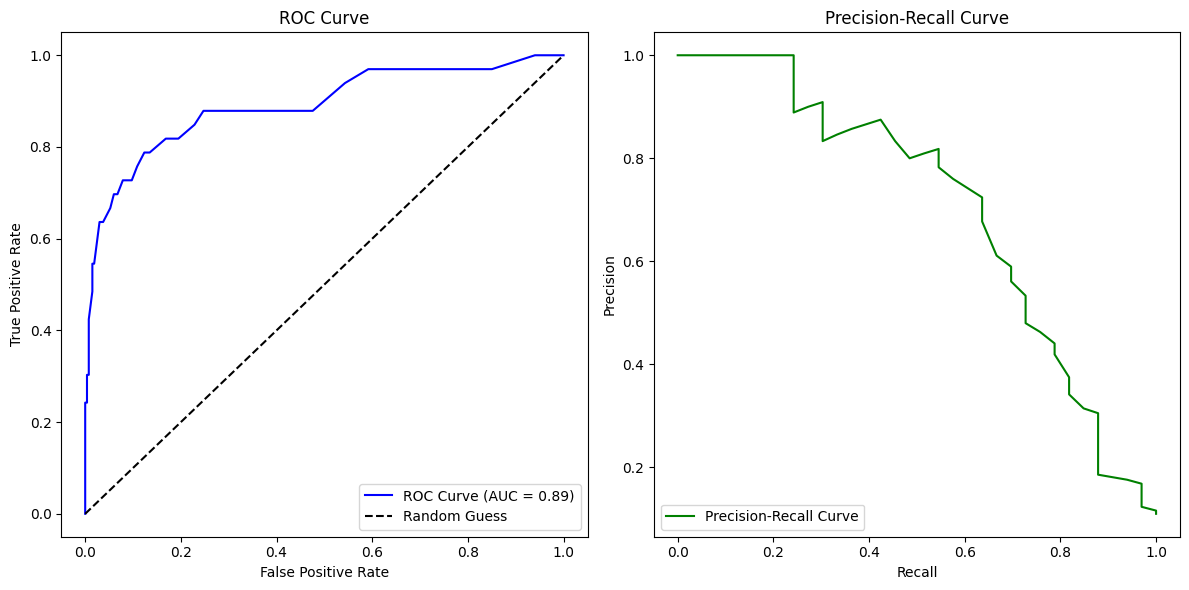

In [29]:
# Step 7: Plot ROC curve
plt.figure(figsize=(12, 6))

# ROC Curve
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")

# Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', label="Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend(loc="lower left")

plt.tight_layout()
plt.show()

**1. ROC Curve (Left Plot)**

- **Y-axis (True Positive Rate)**: Measures how many actual positives (e.g., defaulters) the model correctly identifies.
- **X-axis (False Positive Rate)**: Measures how many actual negatives (e.g., non-defaulters) are incorrectly identified as positives.

**Key Observations**:

- The blue curve shows the trade-off between TPR and FPR at different thresholds.
- The **dashed diagonal line** represents random guessing (no predictive power).
- The **AUC (Area Under Curve)** value is **0.89**, indicating that the model performs well (close to 1.0 is ideal).


**2. Precision-Recall Curve (Right Plot)**

- **Y-axis (Precision)**: Measures how many of the predicted positives are actually correct.
- **X-axis (Recall)**: Measures how many actual positives are correctly predicted.

**Key Observations**:

- The green curve shows the trade-off between precision and recall.
- The model starts with **high precision** at low recall (fewer false positives) and gradually reduces precision as recall increases.

**Summary of Results**:

- The model performs well overall, as indicated by a high **ROC AUC (0.89)** and a good balance between precision and recall.
- The ROC Curve is useful for understanding how the model separates classes, while the Precision-Recall Curve is particularly valuable for imbalanced datasets (like loan default detection).

## References and Credits